In [1]:
# CSE5334: Data Mining -Assignment 01: Problem 02
# Non-parameteric Density Estimation

import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Problem 2.1
# Write a function [p, x] = mykde(X,h) that performs kernel density estimation on X with bandwidth h. 
# It should return the estimated density p(x) and its domain x where you estimated the p(x) for X in 1-D and 2-D.

def mykde(X,h):
    
    kernalDensity = {}
   
    dataPoints = 1000
    ran = random.randint(1,dataPoints+1)
    #ran = 3
    count = 0
    dataset = random.sample(X.tolist(), ran)
    #print(data)
    for i in range(4):
        kernalDensity[i] = []
    for value in h:
        estimatedDensity = []
        for x in dataset:

            px1=0
            for a in dataset:
                #print((a))
                if (type(a) == float):
                    dimension = 1
                    u = (x-a)/value
                    
                else:
                    dimension = 2
                    u = np.sqrt(np.sum(np.square(np.asarray(x)-np.asarray(a))))/value
                    
                if abs(u) <= 0.5:
                    #ku.append(1)
                    px1 += (1/(value**dimension))
                else:
                    #ku.append(0)
                    px1 += (0/(value**dimension))
                    
            estimatedDensity.append(px1/ran)
        kernalDensity[count].append(estimatedDensity)
        count += 1

    
    
    #x = np.random.normal(size = 1000)
    
    
    return (kernalDensity, dataset)

C:\Users\Saurabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


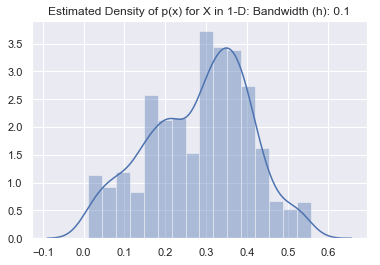

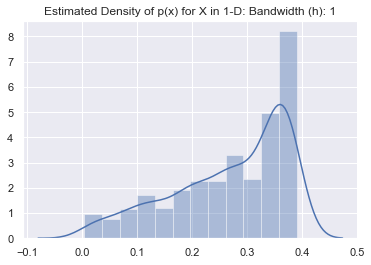

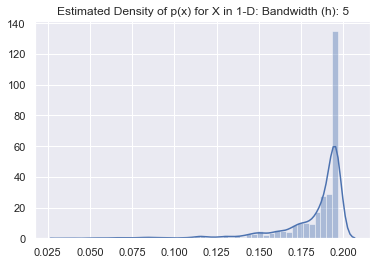

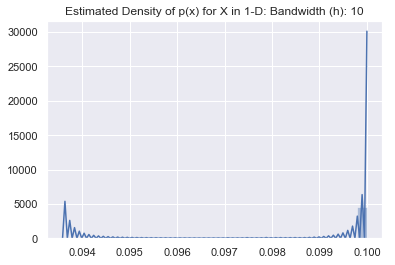

In [3]:
# Problem 2.2
# Generate N = 1000 Gaussian random data with mean1 = 5 and std1 = 1. 
# Test your function mykde on this data with h = {.1, 1, 5, 10}.

mu, sigma = 5, 1 # mean and standard deviation
sampleData = np.random.normal(mu, sigma, 1000)
h= [0.1,1,5,10]
densityEstimateOneD = mykde(sampleData,h)
num = 0
for a in densityEstimateOneD[0]:
    #print(pxx[num])
    sns.set(color_codes=True)
    #sns.distplot(np.asarray(a))
    sns.distplot(np.asarray(densityEstimateOneD[0][num]))
    plt.title('Estimated Density of p(x) for X in 1-D: Bandwidth (h): {}'.format(h[num]))
    plt.show()
    num += 1

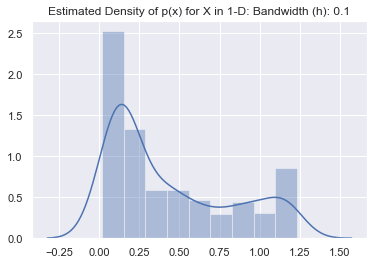

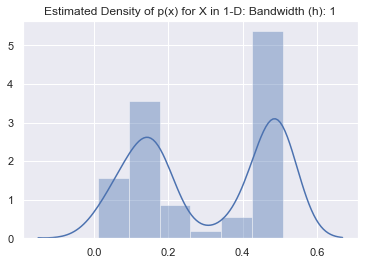

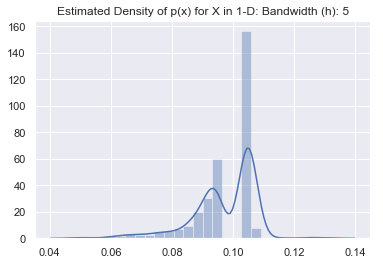

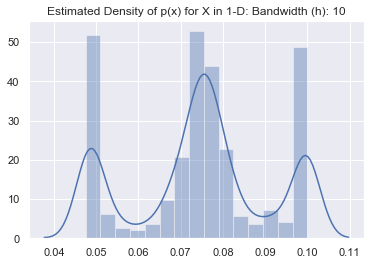

In [4]:
# Problem 2.3
# Generate N = 1000 Gaussian random data with mean1 = 5 and std1 = 1 and another data with mean2 = 0 and std2 = -0.2. 
# Test your function mykde on this data with h = {.1, 1, 5, 10}.

mu1, sigma1 = 5, 1 # mean and standard deviation
dataset1 = np.random.normal(mu1, sigma1, 1000)

mu2, sigma2 = 0, 0.2 # mean and standard deviation
dataset2 = np.random.normal(mu2, sigma2, 1000)
h= [0.1,1,5,10]

dataset = np.concatenate((dataset1,dataset2),axis=0)

densityEstimateOneD = mykde(dataset,h)
num = 0
for a in densityEstimateOneD[0]:
    #print(pxx[num])
    sns.set(color_codes=True)
    plt.title('Estimated Density of p(x) for X in 1-D: Bandwidth (h): {}'.format(h[num]))
    sns.distplot(np.asarray(densityEstimateOneD[0][num]))
    plt.show()
    num += 1

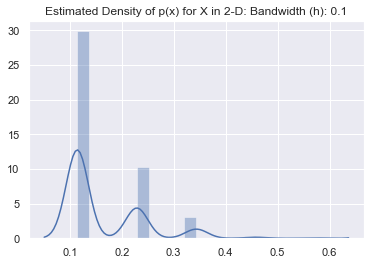

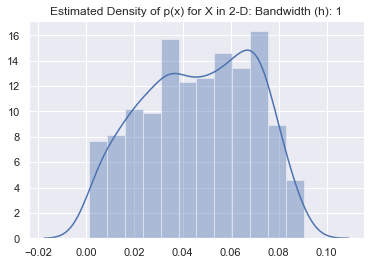

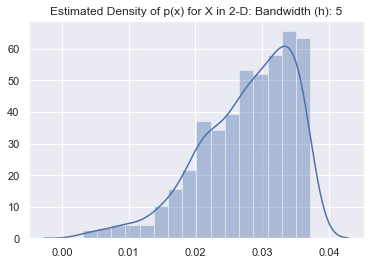

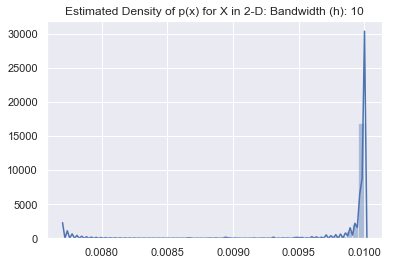

In [6]:
# # Problem 2.4
# Generate 2 sets of 2-D Gaussian random data.
# Test your function mykde on this data with h = {.1, 1, 5, 10}.

cov1 = [[0.9, 0.4], [0.4, 0.9]]
mean1 = (1, 0)
cov2 = [[0.9, 0.4], [0.4, 0.9]]
mean2 = (0, 1.5)

Dataset1 = np.random.multivariate_normal(mean1, cov1,500)
Dataset2 = np.random.multivariate_normal(mean2, cov2,500)
Dataset = np.concatenate((Dataset1,Dataset2),axis=0)

#print(y)
h= [0.1,1,5,10]

densityEstimateTwoD = mykde(Dataset,h)
num = 0
for a in densityEstimateTwoD[0]:
    #print(pxx[num])
    sns.set(color_codes=True)
    plt.title('Estimated Density of p(x) for X in 2-D: Bandwidth (h): {}'.format(h[num]))
    sns.distplot(np.asarray(densityEstimateTwoD[0][num]))
    plt.show()
    num += 1